## Importing Packages


In [41]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Read Dataset

In [42]:
crop = pd.read_csv("Crop_recommendation.csv")

crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [43]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
N              2200 non-null int64
P              2200 non-null int64
K              2200 non-null int64
temperature    2200 non-null float64
humidity       2200 non-null float64
ph             2200 non-null float64
rainfall       2200 non-null float64
label          2200 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## Data Analysis


In [44]:
crop.label.value_counts()

pomegranate    100
papaya         100
kidneybeans    100
orange         100
blackgram      100
rice           100
watermelon     100
mungbean       100
mothbeans      100
mango          100
grapes         100
maize          100
coffee         100
pigeonpeas     100
banana         100
cotton         100
apple          100
muskmelon      100
coconut        100
lentil         100
chickpea       100
jute           100
Name: label, dtype: int64

In [45]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [46]:
crop.shape

(2200, 8)

In [47]:
# To check wether there null values
crop.apply(lambda x: len(x.isnull()))

N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

In [48]:
# To check wether there null values or not using the useful function Assert 
assert crop.isnull().sum().sum() == 0

In [49]:
# Eliminating all duplicated rows with drop_duplicates
crop.drop_duplicates(inplace= True)

In [50]:
# To check wether there duplicated values or not using the useful function Assert 
assert crop.duplicated().sum() == 0

In [51]:
# To check wether there unique values in Dataset
crop.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [52]:
# all of the values in the label are unique 
print(crop['label'].unique())
print(" " , len(crop['label'].unique()))

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
  22


In [53]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Exploratory Data Analysis

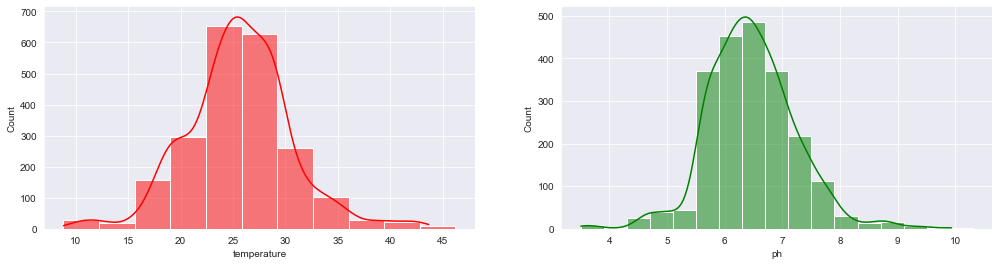

In [54]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(crop.temperature ,binwidth=3.4 , color="red" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(crop.ph ,binwidth=0.4 ,color = "green", kde={'alpha':0.5})
plt.show()

<AxesSubplot:xlabel='humidity', ylabel='Count'>

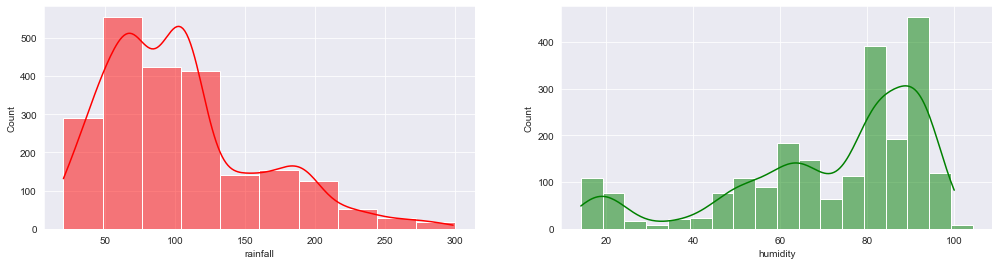

In [55]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(crop.rainfall ,  binwidth=28 ,color="red" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(crop.humidity ,  binwidth=5 ,color="green" , kde={'alpha':0.5})

In [56]:
#Checking the Statistics for all the crops
print("Average Ratio of nitrogen in the soil : {0: .2f}".format(crop['N'].mean()))
print("Average Ratio of Phosphorous in the soil : {0: .2f}".format(crop['P'].mean()))
print("Average Ratio of Potassium in the soil : {0: .2f}".format(crop['K'].mean()))
print("Average temperature in Celsius : {0: .2f}".format(crop['temperature'].mean()))
print("Average Relative Humidity in % is : {0: .2f}".format(crop['humidity'].mean()))
print("Average pH value of the soil : {0: .2f}".format(crop['ph'].mean()))
print("Average Rain fall in mm : {0: .2f}".format(crop['rainfall'].mean()))

Average Ratio of nitrogen in the soil :  50.55
Average Ratio of Phosphorous in the soil :  53.36
Average Ratio of Potassium in the soil :  48.15
Average temperature in Celsius :  25.62
Average Relative Humidity in % is :  71.48
Average pH value of the soil :  6.47
Average Rain fall in mm :  103.46


<AxesSubplot:xlabel='Count', ylabel='label'>

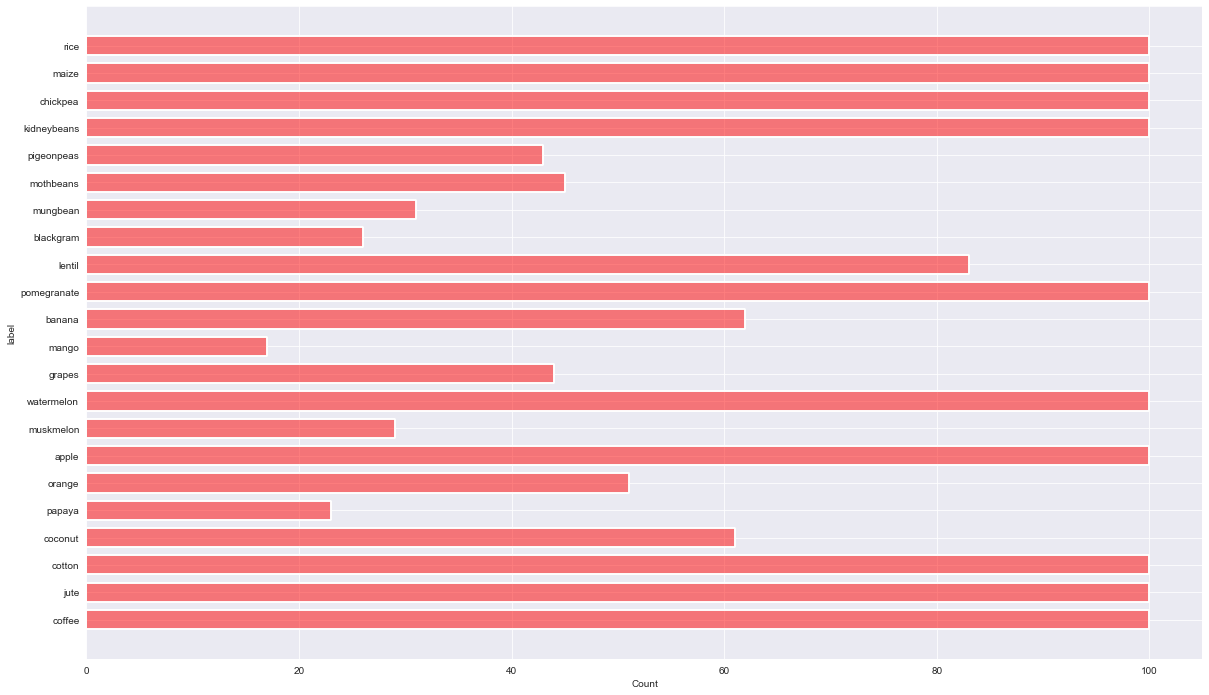

In [57]:
#The best suitable temperatures for the growth of the mango tree are when the temperature is 30 - 32 ° C
#and it can withstand high temperatures between 44 - 48 ° C. and 
# At temperatures of 18 degrees Celsius or less, they die just as mango trees are damaged

plt.figure(figsize=(20,12))
Crop_Median_Temperatures =crop.query("temperature > 15  & temperature <= 28 ") 
sns.histplot(y=Crop_Median_Temperatures.label, shrink=.7 ,color="red" , alpha=0.5 )

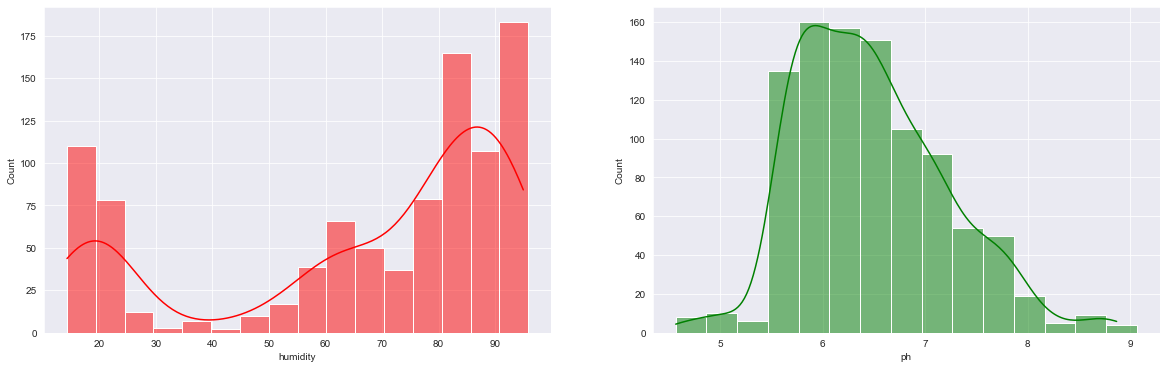

In [58]:
# Whenever the temperature is more than 20, every time the humidity level increases,
# it is not a requirement to constantly increase, it can be lowered, but it will not drop below 50%
#The Optimum pH for most plants is between 5.5 and 8 , depending on the type of plant

plt.figure(figsize=(20,6))
Crop_Temperatures =crop.query("temperature < 25 ") 
plt.subplot(1,2,1)
sns.histplot(Crop_Temperatures.humidity ,  binwidth=5.1 ,color="red" , kde={'alpha':0.5},)
plt.subplot(1,2,2)
sns.histplot(Crop_Temperatures.ph ,  binwidth=0.3 ,color="green" , kde={'alpha':0.5})
plt.show()

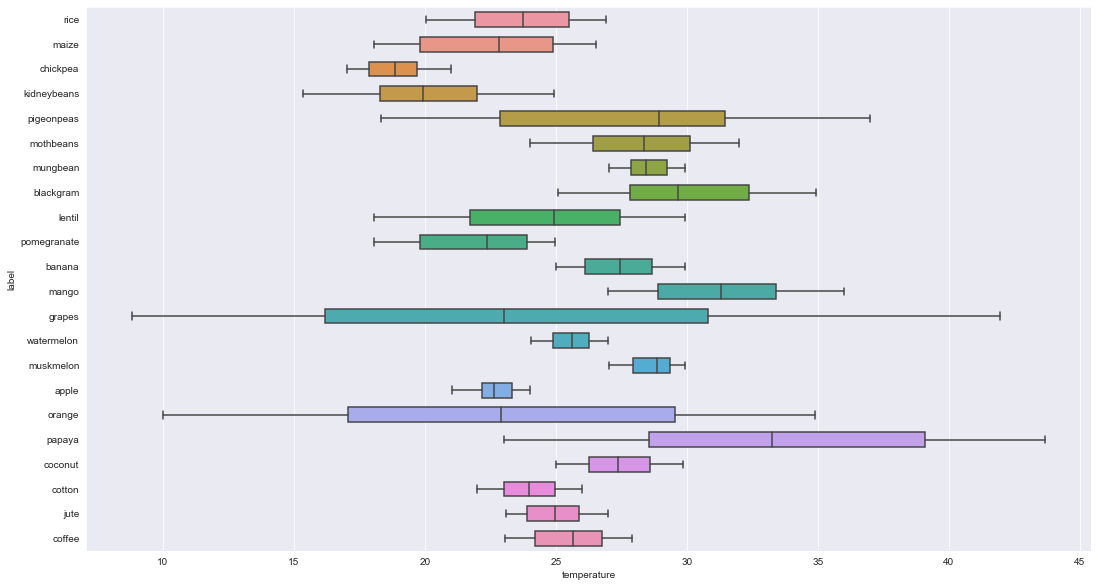

In [59]:
# As shown in the figure, plants that need high or low temperatures, and this is an important point in determining when to plant a plant.
plt.figure(figsize=(18,10))
sns.boxplot(x="temperature", y="label", data=crop,
            whis=[0, 100], width=.6 , orient="h")
plt.show()

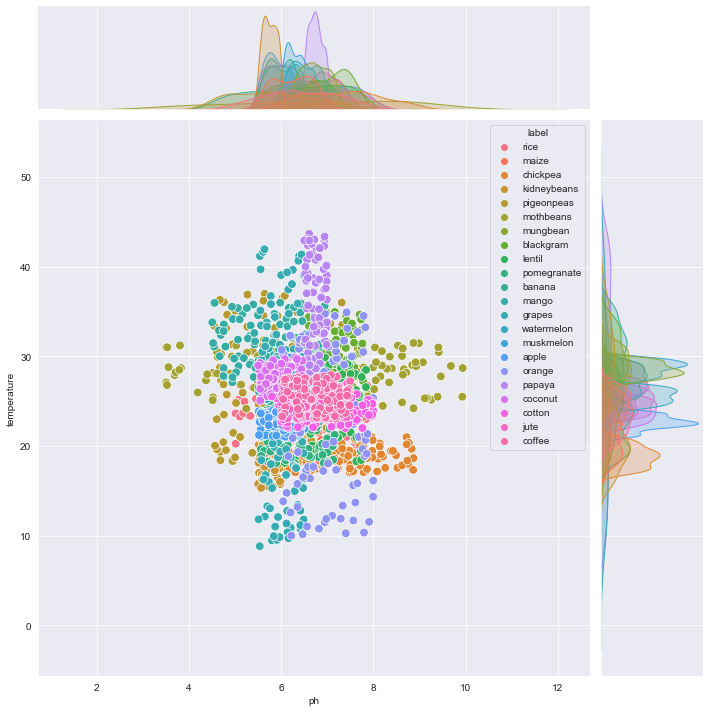

In [60]:
# In general, when the temperature rises above 21 pH decrease 
# The Optimum pH for most plants is between 5.5 and 8 , depending on the type of plant
sns.jointplot(data=crop, x="ph", y="temperature" ,height=10 ,hue="label" , space=0.1 ,s=75 )
plt.show()

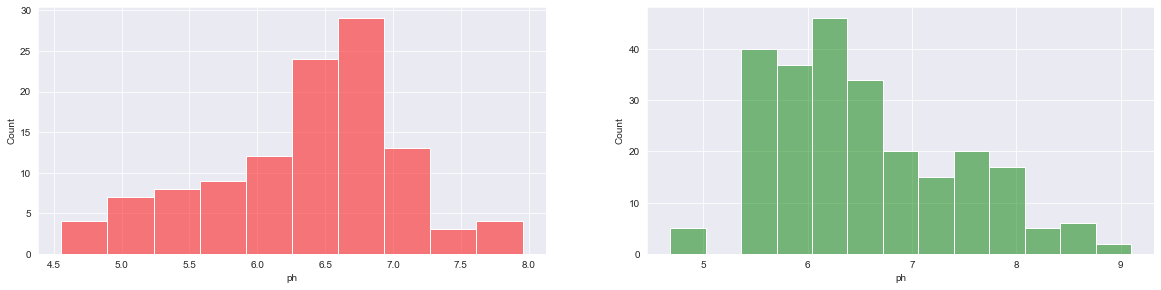

In [61]:
# pH decreases with increase in temperature.
Crop_high_Temperatures =crop.query("temperature > 34 ") 
Crop_low_Temperatures =crop.query("temperature < 19.5 ") 
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.histplot(Crop_high_Temperatures.ph , binwidth=.34,color="red" ,alpha=0.5,)
plt.subplot(2,2,2)
sns.histplot(Crop_low_Temperatures.ph , binwidth=.34  ,color="green" ,alpha=0.5)
plt.show()

In [62]:
print( "Lowest pH value at low temperatures : " , Crop_low_Temperatures.ph.min())
print( "Lowest pH value at Highest temperatures : " , Crop_high_Temperatures.ph.min())
print("- -- -- --- --- -- --- ")
print( "Highest pH value at low temperatures : " , Crop_low_Temperatures.ph.max())
print( "Highest pH value at Highest temperatures : " , Crop_high_Temperatures.ph.max())
print("- -- -- --- --- -- --- ")
print( "Average pH value at low temperatures : " , Crop_low_Temperatures.ph.mean())
print( "Average pH value at Highest temperatures : " , Crop_high_Temperatures.ph.mean())

Lowest pH value at low temperatures :  4.681576043
Lowest pH value at Highest temperatures :  4.555688532
- -- -- --- --- -- --- 
Highest pH value at low temperatures :  8.868741443
Highest pH value at Highest temperatures :  7.786725333
- -- -- --- --- -- --- 
Average pH value at low temperatures :  6.540344889121458
Average pH value at Highest temperatures :  6.348908818991152


In [63]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season
print("Summer Crops")
print(crop[(crop['temperature'] > 30) & (crop['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(crop[(crop['temperature'] < 20) & (crop['humidity'] < 35)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(crop[(crop['rainfall'] > 200) & (crop['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['chickpea' 'kidneybeans' 'pigeonpeas']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


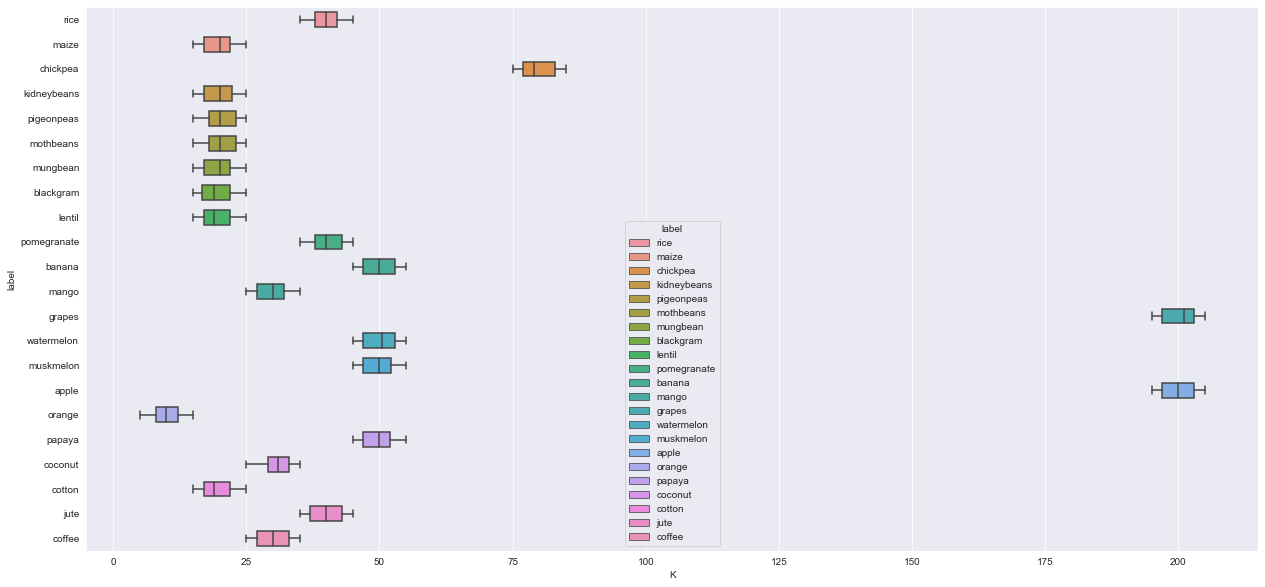

In [64]:
# As shown in the figure, plants that need high or low temperatures, and this is an important point in determining when to plant a plant.
plt.figure(figsize=(21,10))
sns.boxplot(x="K", y="label", data=crop,
            whis=[0, 100], width=0.6
            , orient="h" ,  hue="label" , dodge=False)
plt.show()

In [65]:
print("Crops which requires very Low Ratio of Potassium Content in Soil:", crop[crop['K']  < 15]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", crop[crop['K'] > 175]['label'].unique())
print("Crops which requires median Ratio of Potassium Content in Soil:", crop.query("K > 45 & K < 90")['label'].unique())

Crops which requires very Low Ratio of Potassium Content in Soil: ['orange']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires median Ratio of Potassium Content in Soil: ['chickpea' 'banana' 'watermelon' 'muskmelon' 'papaya']


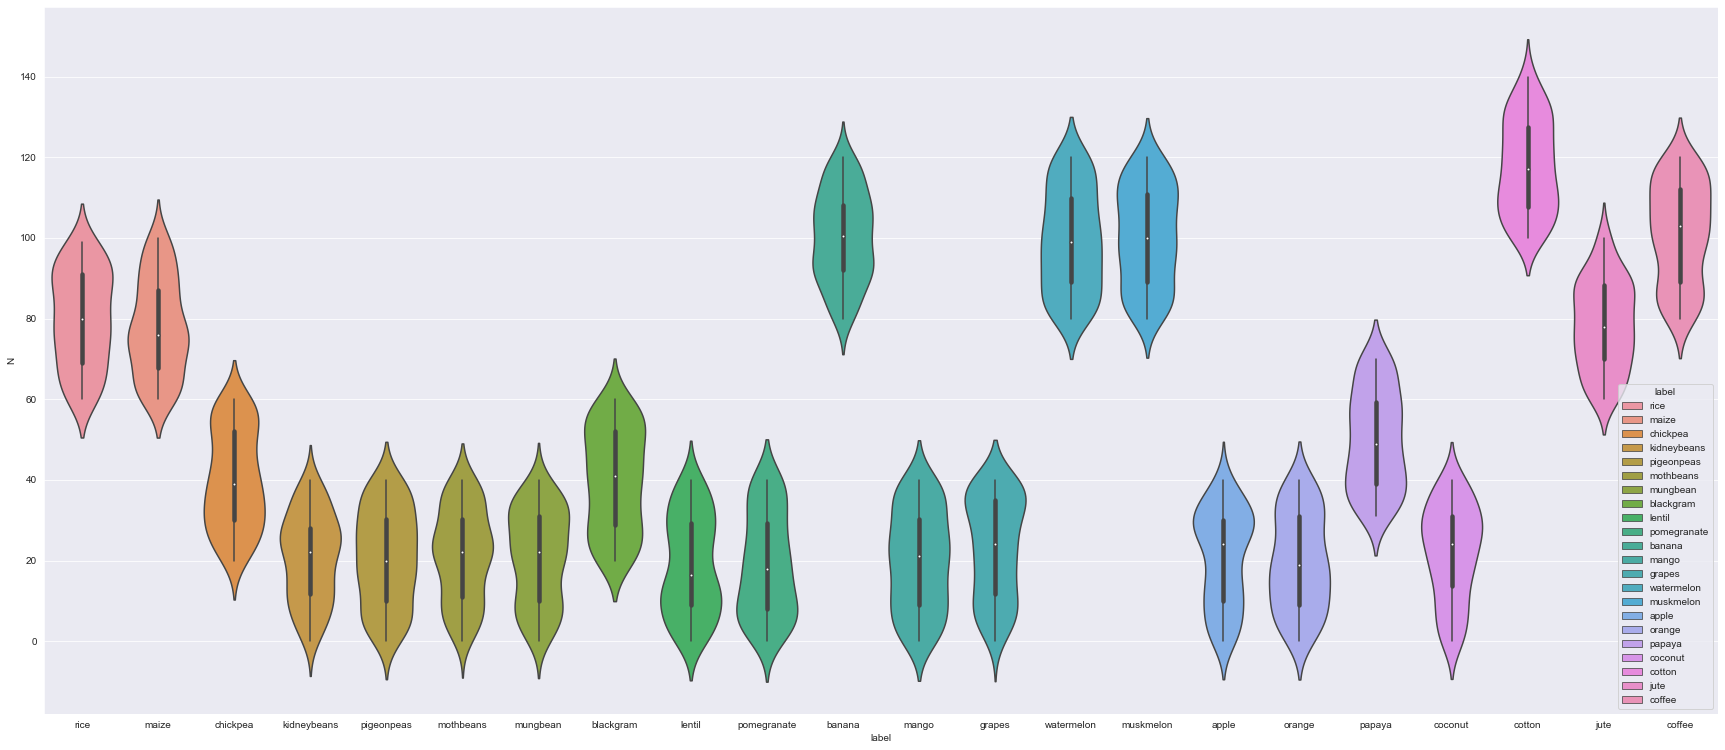

In [66]:
plt.figure(figsize=(30,13))
sns.violinplot(x="label", y="N", data=crop, hue="label" ,dodge=False)
plt.show()

In [67]:
print("Crops which requires very Low Ratio of Nitrogen Content in Soil:", crop[crop['N']  < 10]['label'].unique())
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", crop[crop['N'] > 110]['label'].unique())
print("Crops which requires median Ratio of Nitrogen Content in Soil:", crop.query("N > 40 & N < 80")['label'].unique())

Crops which requires very Low Ratio of Nitrogen Content in Soil: ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'lentil' 'pomegranate'
 'mango' 'grapes' 'apple' 'orange' 'coconut']
Crops which requires very High Ratio of Nitrogen Content in Soil: ['banana' 'watermelon' 'muskmelon' 'cotton' 'coffee']
Crops which requires median Ratio of Nitrogen Content in Soil: ['rice' 'maize' 'chickpea' 'blackgram' 'papaya' 'jute']


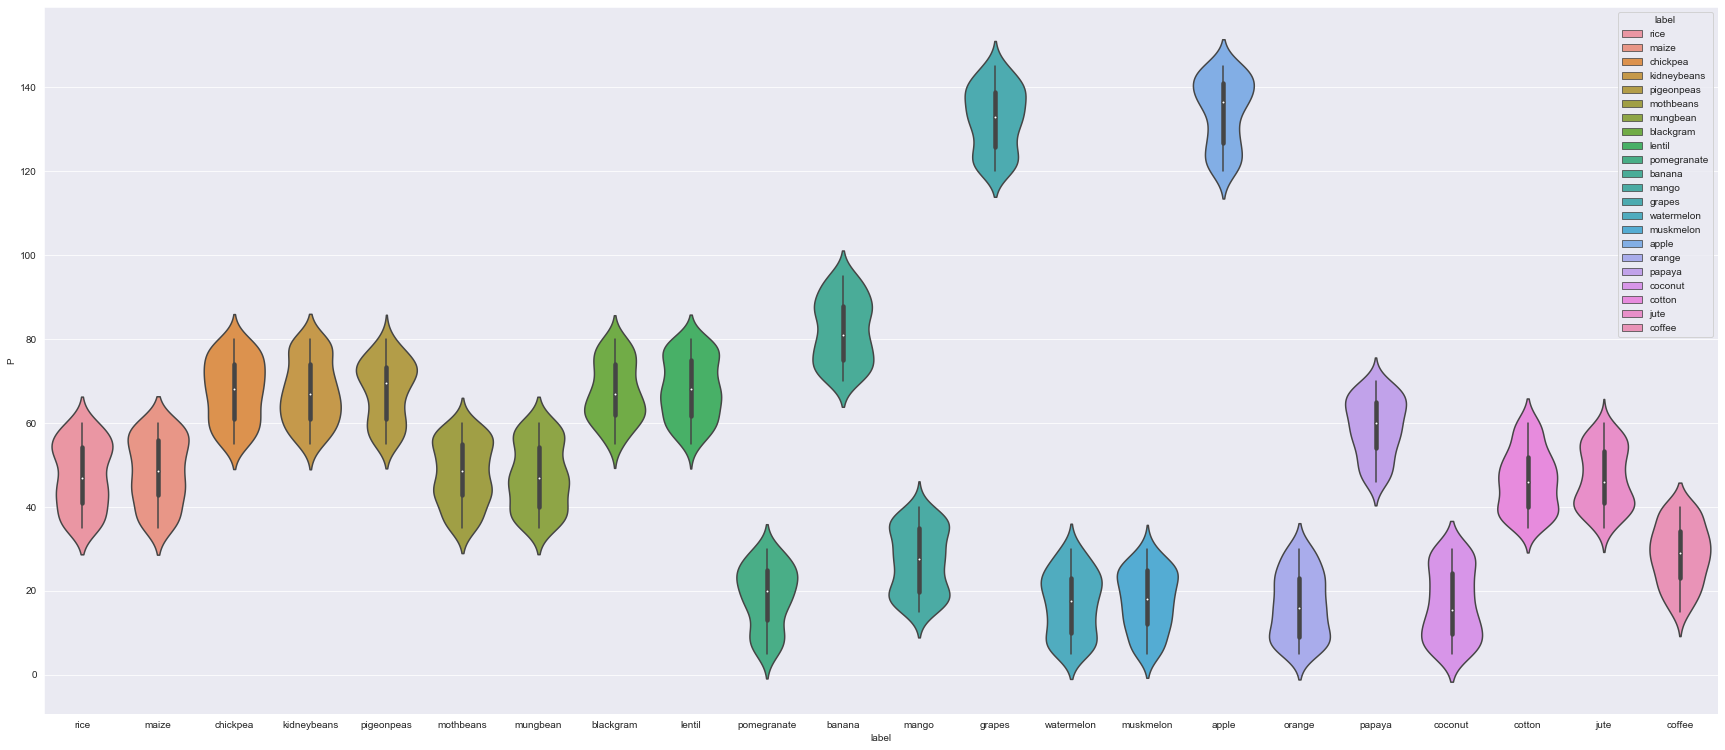

In [68]:
plt.figure(figsize=(30,13))
sns.violinplot(x="label", y="P", data=crop, hue="label" ,dodge=False)
plt.show()

In [69]:
print("Crops which requires very Low Ratio of Phosphorus Content in Soil:", crop[crop['P']  < 10]['label'].unique())
print("Crops which requires very High Ratio of Phosphorus Content in Soil:", crop[crop['P'] > 110]['label'].unique())
print("Crops which requires median Ratio of Phosphorus Content in Soil:", crop.query("P > 70 & P < 110")['label'].unique())

Crops which requires very Low Ratio of Phosphorus Content in Soil: ['pomegranate' 'watermelon' 'muskmelon' 'orange' 'coconut']
Crops which requires very High Ratio of Phosphorus Content in Soil: ['grapes' 'apple']
Crops which requires median Ratio of Phosphorus Content in Soil: ['chickpea' 'kidneybeans' 'pigeonpeas' 'blackgram' 'lentil' 'banana']


In [70]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact
def compare(conditions = ['N','P','K']):
    print()
    print("1- {con} level in soil relative to Rice : ".format(con = conditions))
    print("The Rice plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "rice"][conditions].mean())
    print("The Rice plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "rice"][conditions].min())
    print("The Rice plant has the High potassium content in the soil = ", crop[crop['label'] == "rice"][conditions].max())
    print()
    print("2- {con} level in soil relative to Cotton : ".format(con = conditions))
    print("The Cotton plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "cotton"][conditions].mean())
    print("The Cotton plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "cotton"][conditions].min())
    print("The Cotton plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "cotton"][conditions].max())
    print()
    print("3- {con} level in soil relative to Mango : ".format(con = conditions))
    print("The Mango plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "mango"][conditions].mean())
    print("The Mango plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "mango"][conditions].min())
    print("The Mango plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "mango"][conditions].max())
    print()
    print("4- {con} level in soil relative to Apple : ".format(con = conditions))
    print("The Apple plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "apple"][conditions].mean())
    print("The Apple plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "apple"][conditions].min())
    print("The Apple plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "apple"][conditions].max())
    print()
    print("5- {con} level in soil relative to Maize : ".format(con = conditions))
    print("The Maize plant has the mean {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "maize"][conditions].mean())
    print("The Maize plant has the lowest {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "maize"][conditions].min())
    print("The Maize plant has the High {con} content in the soil = ".format(con =conditions), crop[crop['label'] == "maize"][conditions].max())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K'), value='N'), Output()), _dom_…

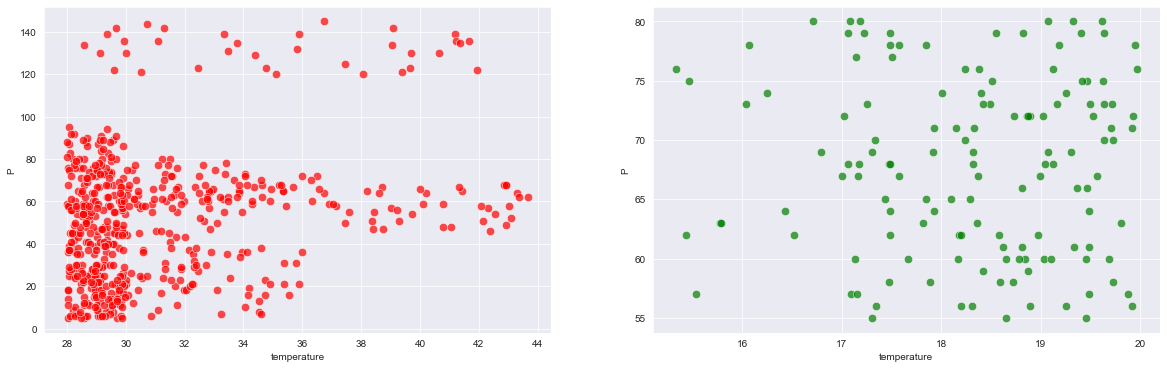

In [71]:
high_weather = crop.query("temperature > 28 & humidity > 50 ")
cold_weather = crop.query("temperature < 20  & humidity < 40")
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=high_weather, x="temperature", y="P"  ,s=70 , color='red' , alpha =0.7)
plt.subplot(1,2,2)
sns.scatterplot(data=cold_weather, x="temperature", y="P" ,s=70 , color="green" , alpha =0.7 )
plt.show()

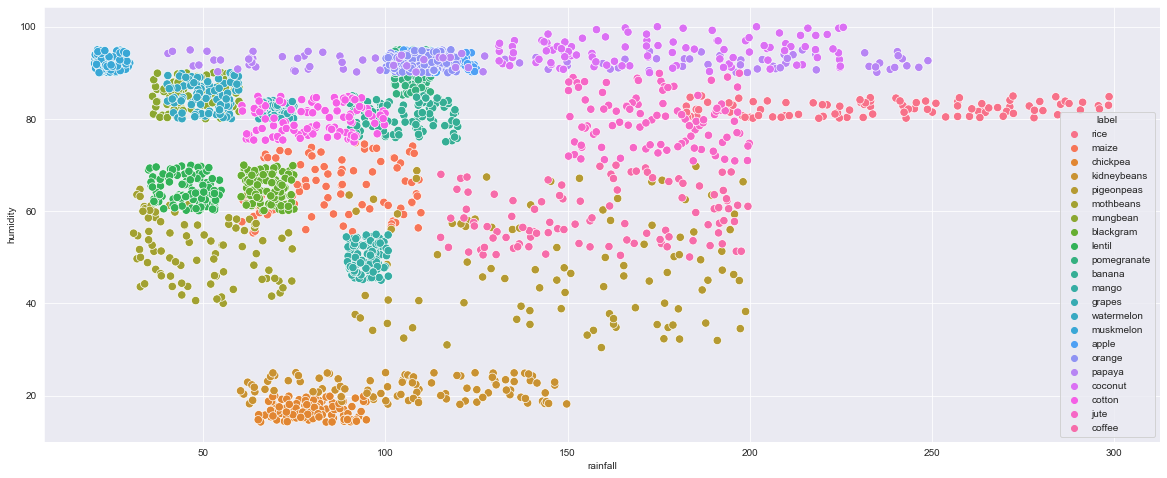

In [72]:
# In general, when precipitation increases, it increases with the degree of humidity
plt.figure(figsize=(20,8))
sns.scatterplot(data=crop, x="rainfall", y="humidity" , hue="label" ,s=70)
plt.show()

In [73]:
high_rainfall = crop.query("rainfall > 100")
low_rainfall = crop.query("rainfall < 80")
print( "Lowest humidtiy value at low rainfall : " , low_rainfall.humidity.min())
print( "Lowest humidtiy value at Highest rainfall : " , high_rainfall.humidity.min())
print("- -- -- --- --- -- --- ")
print( "Highest humidtiy value at low rainfall : " , low_rainfall.humidity.max())
print( "Highest humidtiy value at Highest rainfall : " , high_rainfall.humidity.max())
print("- -- -- --- --- -- --- ")
print( "Average humidtiy value at low rainfall : " , low_rainfall.humidity.mean())
print( "Average humidtiy value at Highest rainfall : " , high_rainfall.humidity.mean())


Lowest humidtiy value at low rainfall :  14.2804191
Lowest humidtiy value at Highest rainfall :  18.09224048
- -- -- --- --- -- --- 
Highest humidtiy value at low rainfall :  94.96218673
Highest humidtiy value at Highest rainfall :  99.98187601
- -- -- --- --- -- --- 
Average humidtiy value at low rainfall :  71.07705611700452
Average humidtiy value at Highest rainfall :  76.79911204936819


## Correlation between different features

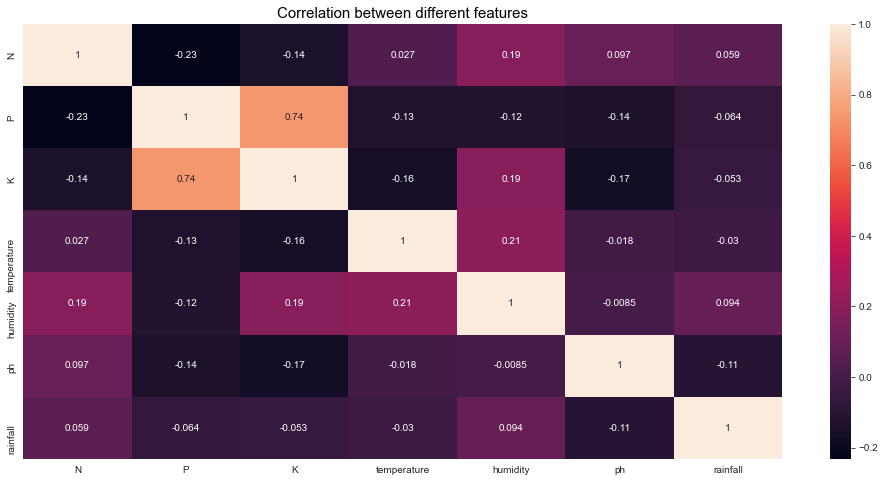

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
sns.heatmap(crop.corr(), annot=True )
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

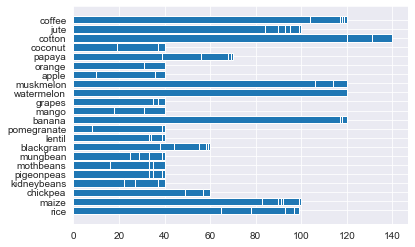

In [75]:
plt.barh(crop['label'], crop['N'])
plt.show()

In [76]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
crop['label']= label_encoder.fit_transform(crop['label'])
crop['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5], dtype=int64)

In [77]:
x = crop.drop(['label'], axis = 1)
y = crop['label']

print("The Shape of x:", x.shape)
print("The Shape of y:", y.shape)

The Shape of x: (2200, 7)
The Shape of y: (2200,)


In [78]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [79]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

## Feature Selection

In [80]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
X = x.values
y = y.values
y = y.ravel()

In [81]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

# check selected features - first 5 features are selected
feat_selector.support_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	7
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	0


array([ True,  True,  True,  True,  True,  True,  True])

In [82]:
# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X = feat_selector.transform(X)

## K-Nearest Neighbors

In [83]:
# build the KNN model
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X,y)

KNeighborsClassifier()

In [84]:
# predict the results
y_pred=kn_classifier.predict(X)

In [85]:
pred_kn = kn_classifier.predict(X)

## Model Evaluation

In [86]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(kn_classifier.score(X, y)))
print('Test set score: {:.4f}'.format(kn_classifier.score(X, y)))

Training set score: 0.9882
Test set score: 0.9882


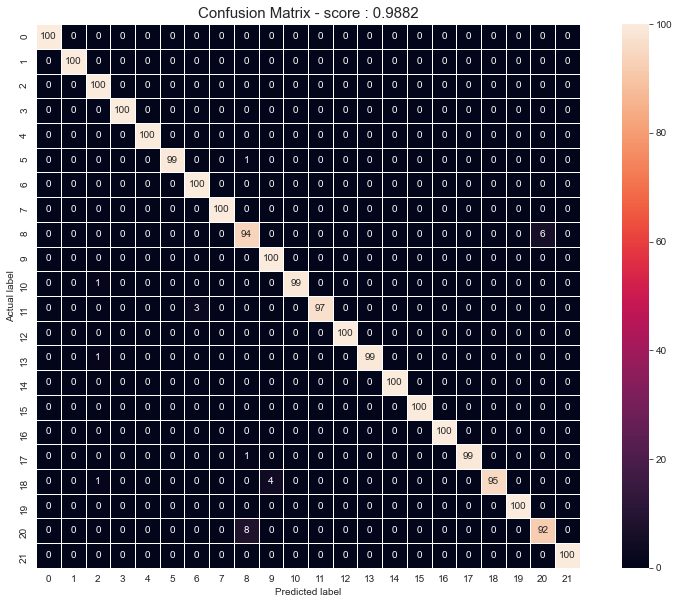

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score : {:.4f}'.format(kn_classifier.score(X, y))
plt.title(all_sample_title, size = 15);
plt.show()

In [88]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y, y_pred)

In [89]:
from sklearn.metrics import cohen_kappa_score
knn_kap = cohen_kappa_score(y, y_pred)

In [90]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
knn_log = cross_val_score(estimator=KNeighborsClassifier(),
            X = crop.drop(['label'], axis = 1),
            y = crop['label'],
            cv = StratifiedKFold(n_splits = 10),
            scoring='accuracy')

In [91]:
from sklearn.metrics import mean_absolute_error
knn_mean = mean_absolute_error(y, y_pred)

In [92]:
from sklearn.metrics import roc_auc_score
knn_roc  = roc_auc_score(y, kn_classifier.predict_proba(X), multi_class='ovr')

In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score
knn_pre = precision_score(y, y_pred,average='micro')
knn_re = recall_score(y, y_pred,average='micro')
knn_f1 = f1_score(y, y_pred,average='micro')

# Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X,y)

# predict the results
y_pred=clf.predict(X)
pred_kn = clf.predict(X)

#Model Evalution
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X, y)))
print('Test set score: {:.4f}'.format(clf.score(X, y)))

Training set score: 0.9950
Test set score: 0.9950


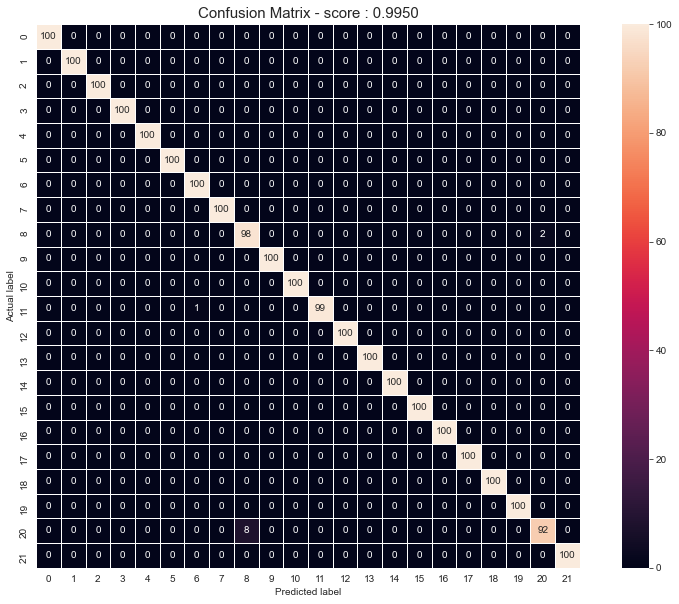

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score : {:.4f}'.format(clf.score(X, y))
plt.title(all_sample_title, size = 15);
plt.show()

In [96]:
nb_acc = accuracy_score(y, y_pred)
nb_kap = cohen_kappa_score(y, y_pred)
nb_log = cross_val_score(estimator=GaussianNB(),
            X = crop.drop(['label'], axis = 1),
            y = crop['label'],
            cv = StratifiedKFold(n_splits = 10),
            scoring='accuracy')
nb_mean = mean_absolute_error(y, y_pred)
nb_roc  = roc_auc_score(y, kn_classifier.predict_proba(X), multi_class='ovr')
nb_pre = precision_score(y, y_pred,average='micro')
nb_re = recall_score(y, y_pred,average='micro')
nb_f1 = f1_score(y, y_pred,average='micro')

# Bagging Classifier

In [97]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)

In [98]:
clf.fit(X,y)

# predict the results
y_pred=clf.predict(X)
pred_kn = clf.predict(X)

#Model Evalution
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X, y)))
print('Test set score: {:.4f}'.format(clf.score(X, y)))

Training set score: 0.9777
Test set score: 0.9777


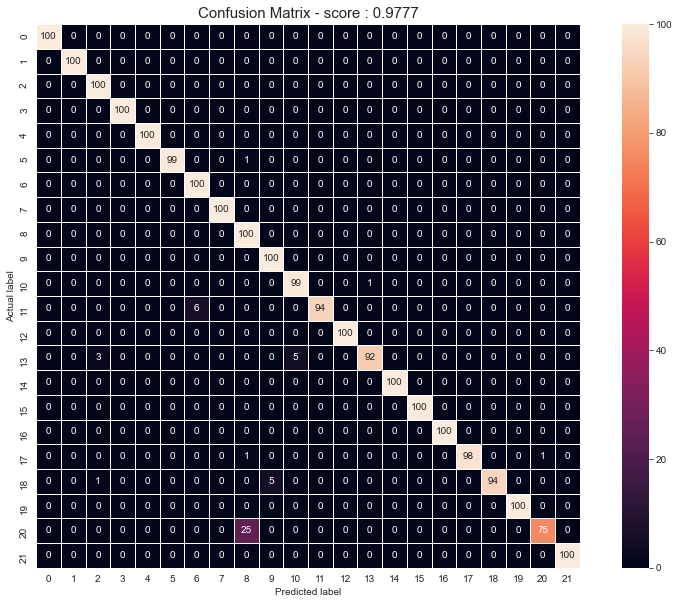

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score : {:.4f}'.format(clf.score(X, y))
plt.title(all_sample_title, size = 15);
plt.show()

In [100]:
bag_acc = accuracy_score(y, y_pred)
bag_kap = cohen_kappa_score(y, y_pred)
bag_log = cross_val_score(estimator=clf,
            X = crop.drop(['label'], axis = 1),
            y = crop['label'],
            cv = StratifiedKFold(n_splits = 10),
            scoring='accuracy')
bag_mean = mean_absolute_error(y, y_pred)
bag_roc  = roc_auc_score(y, kn_classifier.predict_proba(X), multi_class='ovr')
bag_pre = precision_score(y, y_pred,average='micro')
bag_re = recall_score(y, y_pred,average='micro')
bag_f1 = f1_score(y, y_pred,average='micro')

# RAndom Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X,y)

# predict the results
y_pred=clf.predict(X)
pred_kn = clf.predict(X)

#Model Evalution
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X, y)))
print('Test set score: {:.4f}'.format(clf.score(X, y)))

Training set score: 1.0000
Test set score: 1.0000


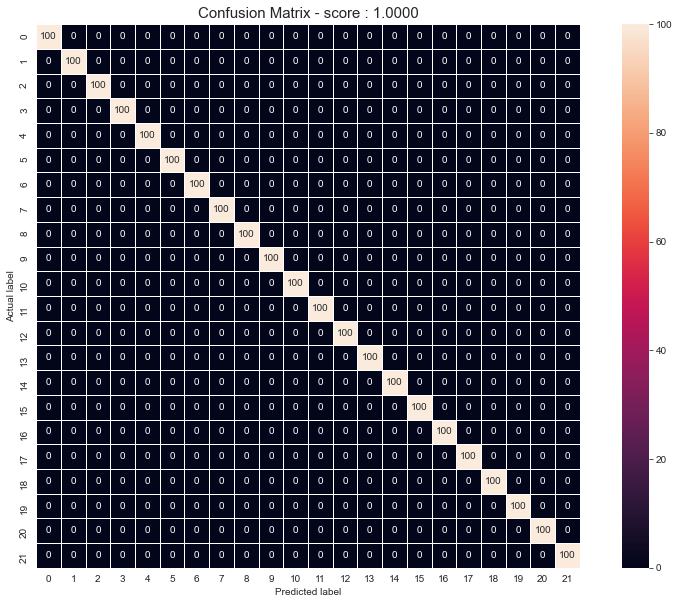

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score : {:.4f}'.format(clf.score(X, y))
plt.title(all_sample_title, size = 15);
plt.show()

In [103]:
rf_acc = accuracy_score(y, y_pred)
rf_kap = cohen_kappa_score(y, y_pred)
rf_log = cross_val_score(estimator=clf,
            X = crop.drop(['label'], axis = 1),
            y = crop['label'],
            cv = StratifiedKFold(n_splits = 10),
            scoring='accuracy')
rf_mean = mean_absolute_error(y, y_pred)
rf_roc  = roc_auc_score(y, kn_classifier.predict_proba(X), multi_class='ovr')
rf_pre = precision_score(y, y_pred,average='micro')
rf_re = recall_score(y, y_pred,average='micro')
rf_f1 = f1_score(y, y_pred,average='micro')

# Decision Tree

In [104]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(X,y)

# predict the results
y_pred=clf.predict(X)
pred_kn = clf.predict(X)

#Model Evalution
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X, y)))
print('Test set score: {:.4f}'.format(clf.score(X, y)))

Training set score: 1.0000
Test set score: 1.0000


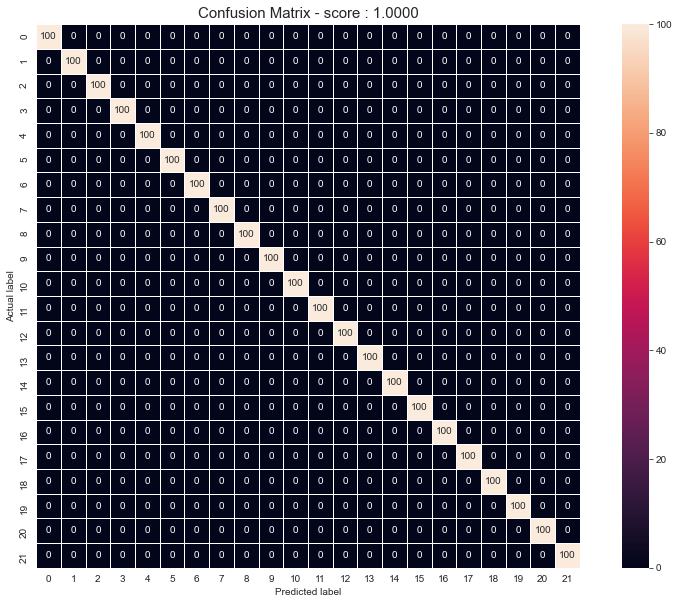

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score : {:.4f}'.format(clf.score(X, y))
plt.title(all_sample_title, size = 15);
plt.show()

In [106]:
dt_acc = accuracy_score(y, y_pred)
dt_kap = cohen_kappa_score(y, y_pred)
dt_log = cross_val_score(estimator=clf,
            X = crop.drop(['label'], axis = 1),
            y = crop['label'],
            cv = StratifiedKFold(n_splits = 10),
            scoring='accuracy')
dt_mean = mean_absolute_error(y, y_pred)
dt_roc  = roc_auc_score(y, kn_classifier.predict_proba(X), multi_class='ovr')
dt_pre = precision_score(y, y_pred,average='micro')
dt_re = recall_score(y, y_pred,average='micro')
dt_f1 = f1_score(y, y_pred,average='micro')

# Support Vector Machine

In [107]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

clf.fit(X,y)

# predict the results
y_pred=clf.predict(X)
pred_kn = clf.predict(X)

#Model Evalution
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X, y)))
print('Test set score: {:.4f}'.format(clf.score(X, y)))

Training set score: 1.0000
Test set score: 1.0000


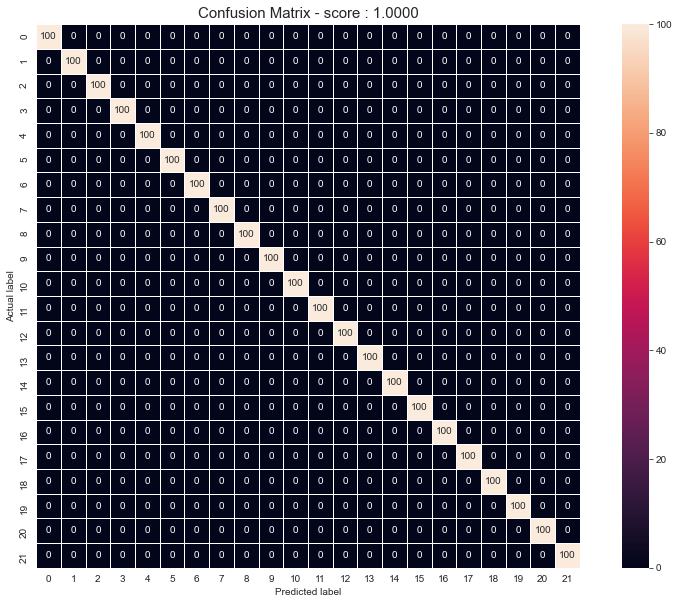

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score : {:.4f}'.format(clf.score(X, y))
plt.title(all_sample_title, size = 15);
plt.show()

In [109]:
svm_acc = accuracy_score(y, y_pred)
svm_kap = cohen_kappa_score(y, y_pred)
svm_log = cross_val_score(estimator=clf,
            X = crop.drop(['label'], axis = 1),
            y = crop['label'],
            cv = StratifiedKFold(n_splits = 10),
            scoring='accuracy')
svm_mean = mean_absolute_error(y, y_pred)
svm_roc  = roc_auc_score(y, kn_classifier.predict_proba(X), multi_class='ovr')
svm_pre = precision_score(y, y_pred,average='micro')
svm_re = recall_score(y, y_pred,average='micro')
svm_f1 = f1_score(y, y_pred,average='micro')

# Gradient Boosting

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)

clf.fit(X,y)

# predict the results
y_pred=clf.predict(X)
pred_kn = clf.predict(X)

#Model Evalution
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X, y)))
print('Test set score: {:.4f}'.format(clf.score(X, y)))

Training set score: 0.0455
Test set score: 0.0455


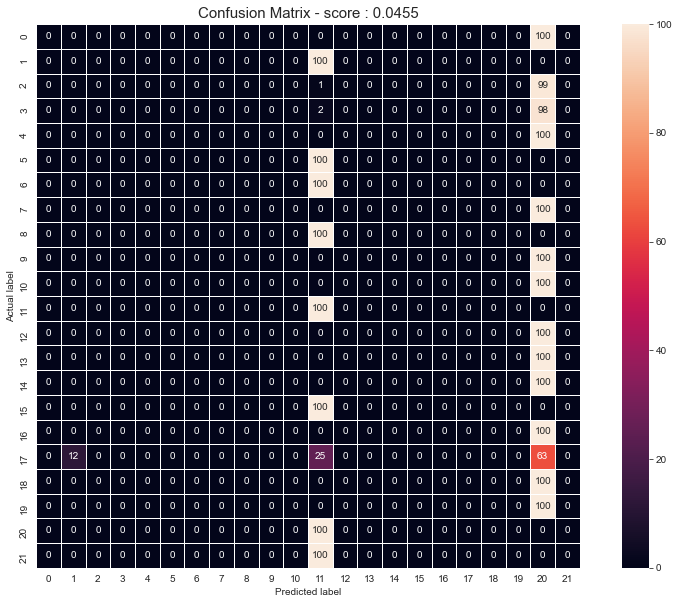

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score : {:.4f}'.format(clf.score(X, y))
plt.title(all_sample_title, size = 15);
plt.show()

In [112]:
gb_acc = accuracy_score(y, y_pred)
gb_kap = cohen_kappa_score(y, y_pred)
gb_log = cross_val_score(estimator=clf,
            X = crop.drop(['label'], axis = 1),
            y = crop['label'],
            cv = StratifiedKFold(n_splits = 10),
            scoring='accuracy')
gb_mean = mean_absolute_error(y, y_pred)
gb_roc  = roc_auc_score(y, kn_classifier.predict_proba(X), multi_class='ovr')
gb_pre = precision_score(y, y_pred,average='micro')
gb_re = recall_score(y, y_pred,average='micro')
gb_f1 = f1_score(y, y_pred,average='micro')

# Voting Classifier

In [113]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

clf.fit(X,y)

# predict the results
y_pred=clf.predict(X)
pred_kn = clf.predict(X)

#Model Evalution
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X, y)))
print('Test set score: {:.4f}'.format(clf.score(X, y)))

Training set score: 1.0000
Test set score: 1.0000


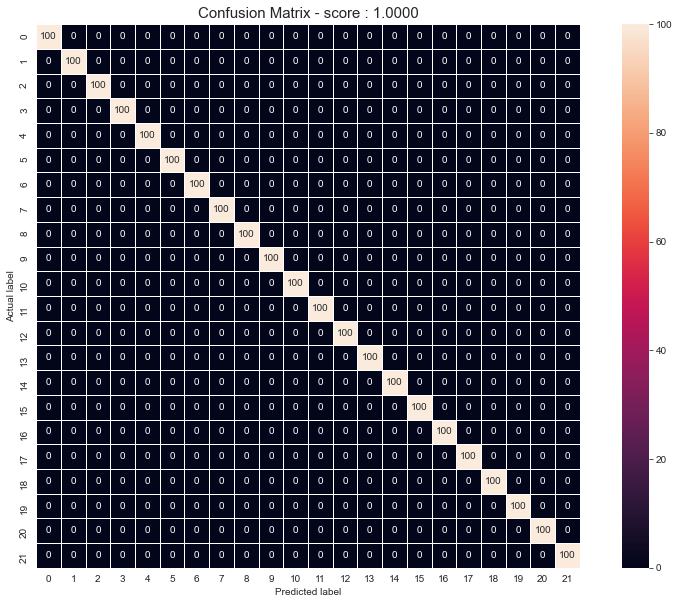

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score : {:.4f}'.format(clf.score(X, y))
plt.title(all_sample_title, size = 15);
plt.show()

In [115]:
vot_acc = accuracy_score(y, y_pred)
vot_kap = cohen_kappa_score(y, y_pred)
vot_log = cross_val_score(estimator=clf,
            X = crop.drop(['label'], axis = 1),
            y = crop['label'],
            cv = StratifiedKFold(n_splits = 10),
            scoring='accuracy')
vot_mean = mean_absolute_error(y, y_pred)
vot_roc  = roc_auc_score(y, kn_classifier.predict_proba(X), multi_class='ovr')
vot_pre = precision_score(y, y_pred,average='micro')
vot_re = recall_score(y, y_pred,average='micro')
vot_f1 = f1_score(y, y_pred,average='micro')

In [116]:
TP = cm[0, 0]
TN = cm[0, 1]
FP = cm[1, 0]
FN = cm[1, 1]
vot_specificity = ((TN / (TN + FP))) * 100

print(vot_specificity)

nan


C:\Users\TruProjects\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  """


Since Specificity values are nan we are calculating for other models

# Comparison

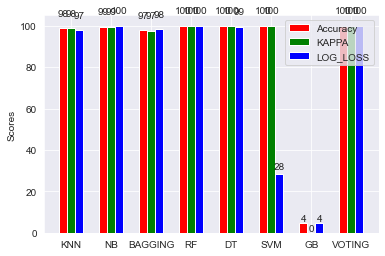

In [117]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [knn_acc*100,nb_acc*100,bag_acc*100,rf_acc*100,dt_acc*100,svm_acc*100,gb_acc*100,vot_acc*100]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [knn_kap*100,nb_kap*100,bag_kap*100,rf_kap*100,dt_kap*100,svm_kap*100,gb_kap*100,vot_kap*100]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [knn_log[0]*100,nb_log[0]*100,bag_log[0]*100,rf_log[0]*100,dt_log[0]*100,svm_log[0]*100,gb_log[0]*100,vot_log[0]*100]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('KNN','NB','BAGGING','RF','DT','SVM','GB','VOTING') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'KAPPA', 'LOG_LOSS') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

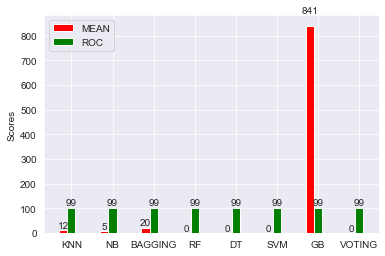

In [118]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [knn_mean*100,nb_mean*100,bag_mean*100,rf_mean*100,dt_mean*100,svm_mean*100,gb_mean*100,vot_mean*100]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [knn_roc*100,nb_roc*100,bag_roc*100,rf_roc*100,dt_roc*100,svm_roc*100,gb_roc*100,vot_roc*100]
rects2 = ax.bar(ind+width, zvals, width, color='g')


ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('KNN','NB','BAGGING','RF','DT','SVM','GB','VOTING') )
ax.legend( (rects1[0], rects2[0]), ('MEAN', 'ROC') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.show()

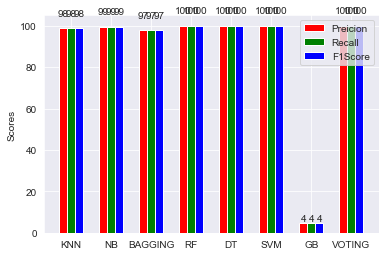

In [119]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [knn_pre*100,nb_pre*100,bag_pre*100,rf_pre*100,dt_pre*100,svm_pre*100,gb_pre*100,vot_pre*100]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [knn_re*100,nb_re*100,bag_re*100,rf_re*100,dt_re*100,svm_re*100,gb_re*100,vot_re*100]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [knn_f1*100,nb_f1*100,bag_f1*100,rf_f1*100,dt_f1*100,svm_f1*100,gb_f1*100,vot_f1*100]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('KNN','NB','BAGGING','RF','DT','SVM','GB','VOTING') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Preicion', 'Recall', 'F1Score') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

In [120]:
score = [knn_acc*100,nb_acc*100,bag_acc*100,rf_acc*100,dt_acc*100,svm_acc*100,gb_acc*100,vot_acc*100]

In [121]:
#make variabel for save the result and to show it
classifier = ('KNN','NB','BAGGING','RF','DT','SVM','GB','VOTING')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7]
[98.81818181818181, 99.5, 97.77272727272728, 100.0, 100.0, 100.0, 4.545454545454546, 100.0]


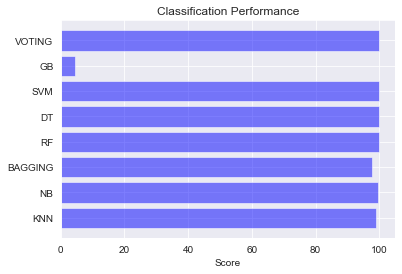

In [122]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()